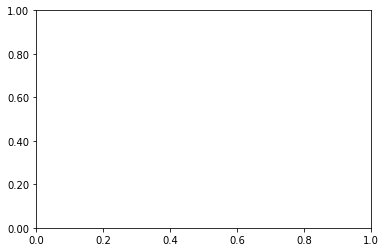

In [83]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
# plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) # No decimal places


In [2]:
# Population Statistics
def create_population(num_people, positive_fraction):
    
    assert positive_fraction <= 1 and positive_fraction >=0 
    return [1 if np.random.random() <= positive_fraction else 0 for i in range(num_people)]

def error(true, pred):
    return abs(true - pred)

In [19]:
def additive_noise(population, 
                   epsilon, 
                   delta, 
                   debug=False, 
                   p=None):
    
    n = len(population)
    if n < 100/(epsilon**2)*np.log(2/delta):
        if debug:
            print("Cannot guarantee privacy: n < {}".format(100/(epsilon**2)*np.log(2/delta)))
        return np.NAN
    
    answer = []
    if not p:
        p = 1 - 50*np.log(2/delta)/(epsilon**2*n) # 
       
    
    if debug:
        print("p: {}".format(p))    
    
    # FAST
    return sum(population)/n + np.random.binomial(n,p)/n - p

def sampling(population, epsilon, delta, debug=False):
    
    answer = []
    n = len(population)
    tau = 3 + np.log(1/delta)
    m = int(np.floor(epsilon*n/tau))
    if m <= 0 or m >=n:
        return -1
    
    p = m/n
    if debug:
        print("true fraction: {}".format(sum(population)/n))
        print("n: {} m: {} tau:{} ({}) p:{}".format(n, m, tau, tau/n, p))

    num_to_sample = np.random.binomial(n, p)
    answer = np.random.choice(population, size=num_to_sample)
    
    if debug:
        print('Pre-thresholding: {}'.format(sum(answer)/len(answer)))
    if sum(answer) < tau:
        return 0
    else:
        return sum(answer)/len(answer)

In [4]:
n = 10**5 # Lots of users
_true = 0.01
DATASET_I = create_population(n, _true) # Only 1% of users have 1's in their data
true = sum(DATASET_I)/n

In [20]:
epsilon = 0.1 # Small ish epsilon but large enough to fit in big sample regime.
delta = 0.05 # Well understood 95% confidence interval.
EPOCHS = 20
ans = defaultdict(list)

print('Add binomial')
for i in range(EPOCHS):    
    sys.stdout.write("\r")
    sys.stdout.write("{}/{}".format(i+1, EPOCHS))    
    pred = additive_noise(DATASET_I, epsilon, delta, debug=False, p=None)
    ans['binomial'].append(error(true, pred))

print('\nSample and Threshold')
for i in range(EPOCHS):
    sys.stdout.write("\r")
    sys.stdout.write("{}/{}".format(i+1, EPOCHS))    
    pred = sampling(DATASET_I, epsilon, delta, debug=False)
    ans['sample'].append(error(true, pred))
    

Add binomial
20/20
Sample and Threshold
20/20

In [6]:
-np.log10(pd.DataFrame(ans).mean())

binomial    3.137448
sample      2.785614
dtype: float64

5/5

Text(0, 0.5, 'ERROR')

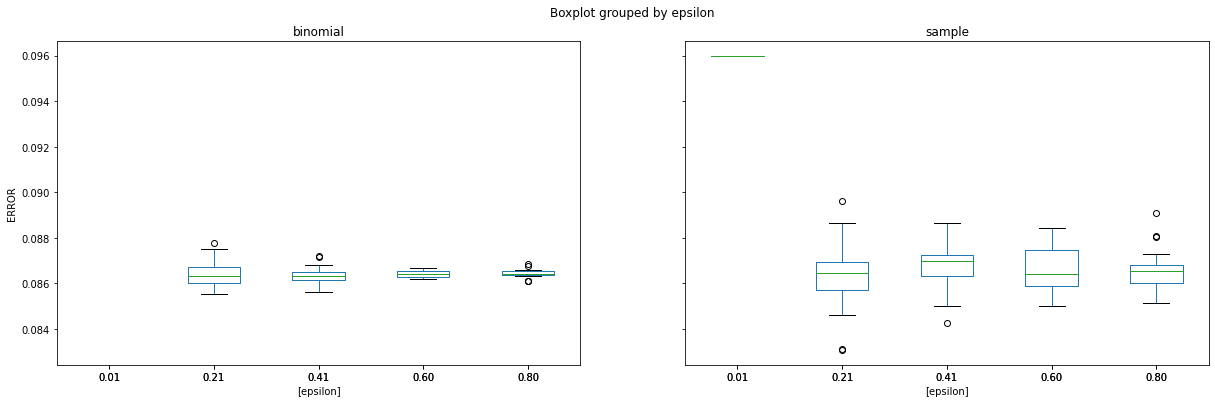

In [128]:
epsilons = np.linspace(0.01, 0.8, 5)
delta = 0.05
data = defaultdict(list)
true = sum(DATASET_I)/n
for i, epsilon in enumerate(epsilons):
    sys.stdout.write("\r")
    sys.stdout.write("{}/{}".format(i+1, len(epsilons)))    
    
    ans = defaultdict(list)
#     print('Add binomial')
    for _ in range(EPOCHS):    
        pred = additive_noise(DATASET_I, epsilon, delta, debug=False, p=None)
        ans['binomial'].append(error(true, pred))

#     print('\nSample and Threshold')
    for _ in range(EPOCHS):
        pred = sampling(DATASET_I, epsilon, delta, debug=False)
        ans['sample'].append(error(true, pred))

    data[epsilon] = {'sample': ans['sample'], 'binomial': ans['binomial']}
    
# df = pd.DataFrame(data, index=['sampleM', 'sampleSTD', 'binM', 'binSTD']).T
# ax = df[['sampleM', 'binM']].plot(figsize=(20,6), fontsize=14)
# ax.set_title('Error of regimes for dense large datasets k/n={0:.4f}'.format(true), fontsize=17)
# ax.set_ylabel('Absolute Error (log10 scale)', fontsize=16)
# ax.set_xlabel('Epsilon', fontsize=16)
# ax.set_yscale('log')    
# pd.DataFrame.from_dict(data, orient='index')
tupes = []
for k_ep in data:
    for alg in ['sample', 'binomial']:
        tupes.append((alg, k_ep))
        temp = data[k_ep][alg]
        

array = [data[i][j] for j,i in tupes]
tupes = [(i, "{0:.2f}".format(float(j))) for i, j in tupes]
index = pd.MultiIndex.from_tuples(tupes, 
                                  names=["alg","epsilon"]) 
df = pd.DataFrame(array, index=index).T

df1 = df.stack(level=1).reset_index(level=0, drop=True).reset_index()
axes = df1.boxplot(by='epsilon', figsize=(20,6), grid=False);
df;
axes[0].set_ylabel('ERROR')

In [130]:
n = 10**4 # Lots of users
_true = 0.92 # Lots of people
DATASET_II = create_population(n, _true) # Only 1% of users have 1's in their data


5/5

Text(0, 0.5, 'ERROR')

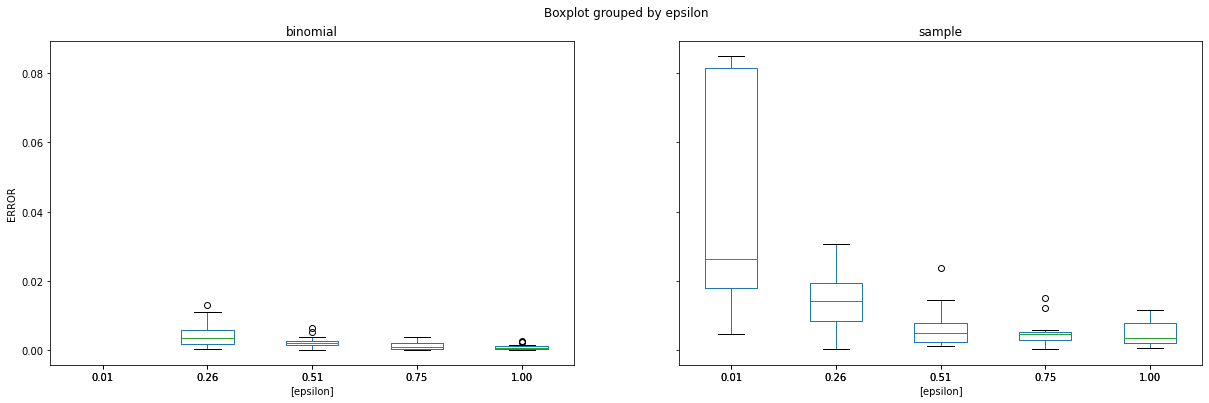

In [132]:
epsilons = np.linspace(0.01, 1, 5)
delta = 0.05
data = defaultdict(list)
true = sum(DATASET_II)/n
for i, epsilon in enumerate(epsilons):
    sys.stdout.write("\r")
    sys.stdout.write("{}/{}".format(i+1, len(epsilons)))    
    
    ans = defaultdict(list)
#     print('Add binomial')
    for _ in range(EPOCHS):    
        pred = additive_noise(DATASET_II, epsilon, delta, debug=False, p=None)
        ans['binomial'].append(error(true, pred))

#     print('\nSample and Threshold')
    for _ in range(EPOCHS):
        pred = sampling(DATASET_II, epsilon, delta, debug=False)
        ans['sample'].append(error(true, pred))

    data[epsilon] = {'sample': ans['sample'], 'binomial': ans['binomial']}
    
# df = pd.DataFrame(data, index=['sampleM', 'sampleSTD', 'binM', 'binSTD']).T
# ax = df[['sampleM', 'binM']].plot(figsize=(20,6), fontsize=14)
# ax.set_title('Error of regimes for dense large datasets k/n={0:.4f}'.format(true), fontsize=17)
# ax.set_ylabel('Absolute Error (log10 scale)', fontsize=16)
# ax.set_xlabel('Epsilon', fontsize=16)
# ax.set_yscale('log')    
# pd.DataFrame.from_dict(data, orient='index')
tupes = []
for k_ep in data:
    for alg in ['sample', 'binomial']:
        tupes.append((alg, k_ep))
        temp = data[k_ep][alg]
        

array = [data[i][j] for j,i in tupes]
tupes = [(i, "{0:.2f}".format(float(j))) for i, j in tupes]
index = pd.MultiIndex.from_tuples(tupes, 
                                  names=["alg","epsilon"]) 
df = pd.DataFrame(array, index=index).T

df1 = df.stack(level=1).reset_index(level=0, drop=True).reset_index()
axes = df1.boxplot(by='epsilon', figsize=(20,6), grid=False);
df;
axes[0].set_ylabel('ERROR')

In [10]:
n = 10**4 # Lots of users
_true = 0.3
DATASET_III = create_population(n, _true) # Only 1% of users have 1's in their data


5/5

Text(0, 0.5, 'ERROR')

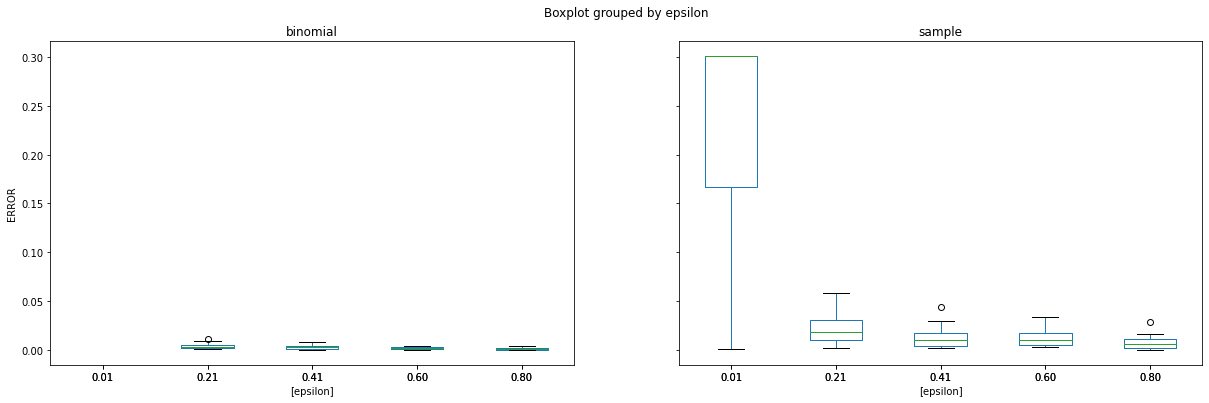

In [125]:
epsilons = np.linspace(0.01, 0.8, 5)
delta = 0.05
data = defaultdict(list)
true = sum(DATASET_III)/n
for i, epsilon in enumerate(epsilons):
    sys.stdout.write("\r")
    sys.stdout.write("{}/{}".format(i+1, len(epsilons)))    
    
    ans = defaultdict(list)
#     print('Add binomial')
    for _ in range(EPOCHS):    
        pred = additive_noise(DATASET_III, epsilon, delta, debug=False, p=None)
        ans['binomial'].append(error(true, pred))

#     print('\nSample and Threshold')
    for _ in range(EPOCHS):
        pred = sampling(DATASET_III, epsilon, delta, debug=False)
        ans['sample'].append(error(true, pred))

    data[epsilon] = {'sample': ans['sample'], 'binomial': ans['binomial']}
    
# df = pd.DataFrame(data, index=['sampleM', 'sampleSTD', 'binM', 'binSTD']).T
# ax = df[['sampleM', 'binM']].plot(figsize=(20,6), fontsize=14)
# ax.set_title('Error of regimes for dense large datasets k/n={0:.4f}'.format(true), fontsize=17)
# ax.set_ylabel('Absolute Error (log10 scale)', fontsize=16)
# ax.set_xlabel('Epsilon', fontsize=16)
# ax.set_yscale('log')    
# pd.DataFrame.from_dict(data, orient='index')
tupes = []
for k_ep in data:
    for alg in ['sample', 'binomial']:
        tupes.append((alg, k_ep))
        temp = data[k_ep][alg]
        

array = [data[i][j] for j,i in tupes]
tupes = [(i, "{0:.2f}".format(float(j))) for i, j in tupes]
index = pd.MultiIndex.from_tuples(tupes, 
                                  names=["alg","epsilon"]) 
df = pd.DataFrame(array, index=index).T

df1 = df.stack(level=1).reset_index(level=0, drop=True).reset_index()
axes = df1.boxplot(by='epsilon', figsize=(20,6), grid=False);
df;
axes[0].set_ylabel('ERROR')

In [18]:
2**6 - 10**5


-99936